<a href="https://colab.research.google.com/github/Nabakindagrace/gracenabakinda_codes/blob/main/Nabakinda_Grace_Natural_Language_Processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


In [ ]:
## mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##importing the dataset into the notebook
data=pd.read_csv('/content/drive/MyDrive/3) Sentiment dataset.csv')
data

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


#Overview of the dataset

The dataset is a collection of social media posts, likely for sentiment analysis, containing 732 entries and 15 columns.

**Typical Columns Include**
1. Text	-The content of the social media post (e.g., "Enjoying a beautiful day at the park!").

2. Sentiment	- The classified emotion/tone of the post (e.g., Positive, Negative, Neutral).

3. Platform	- The social media platform where the post originated (e.g., Twitter, Instagram, Facebook).

4. Timestamp- 	The date and time the post was created (e.g., '2023-01-15 12:30:00').

5. Country-	The geographical origin of the post (e.g., USA, Canada, UK).
Hashtags	Associated hashtags (e.g., #Nature #Park).

6. User	-A user identifier (e.g., 'User123').

7. Retweets	- The count of retweets for the post.

8. Likes	- The count of likes for the post.

9. Year, Month, Day, Hour	- Time components extracted from the Timestamp column.

10. Unnamed: 0.1, Unnamed: 0	- Redundant index columns that can likely be dropped.


# **Goal:**

The goal is to perform sentiment analysis on textual
 data (e.g., customer reviews, social media comments)
 to classify text as positive, negative, or neutral

In [ ]:
#Checking Data Types
data.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
Text,object
Sentiment,object
Timestamp,object
User,object
Platform,object
Hashtags,object
Retweets,float64
Likes,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
##checking for missing values
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [ ]:
## CHECKING FOR DUPLICATES
data.duplicated().sum()

np.int64(0)

In [ ]:
# --- 1. Download necessary NLTK data ---
# This step ensures all required resources for tokenization,
# stopword removal, and lemmatization are available.
# In an interactive environment, these need to be downloaded only once.
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('punkt_tab', quiet=True) # Added download for punkt_tab
except Exception:
    # Handles issues if download is restricted, but the code structure is correct.
    print("NLTK resource download encountered an issue, proceeding with existing resources.")

In [ ]:
# --- 2. Initialize Stopwords and Lemmatizer ---
# Get the English stop words from NLTK.
stop_words = set(stopwords.words('english'))

# Initialize the WordNet Lemmatizer.
lemmatizer = WordNetLemmatizer()


# --- 3. Define the Preprocessing Function ---
def preprocess_text(text):
    # 1. Cleaning: Convert to lowercase
    text = text.lower()

    # Cleaning: Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Cleaning: Remove mentions (@user) and hashtag symbols (#)
    text = re.sub(r'@\w+|#', '', text)

    # Cleaning: Remove punctuation and numbers, keeping only letters and spaces
    # This removes characters like '!', '?', '.', and digits.
    text = re.sub(r'[^a-z\s]', '', text)

    # 2. Tokenization: Split the text into individual words
    tokens = word_tokenize(text)

    # 3. Removing Stopwords and Lemmatization
    processed_tokens = []
    for word in tokens:
        if word and word not in stop_words:
            # Lemmatization: Convert the word to its base or dictionary form.
            # We use the default part-of-speech (noun).
            word = lemmatizer.lemmatize(word)
            processed_tokens.append(word)

    # Join tokens back into a single string
    return ' '.join(processed_tokens)

In [ ]:
# --- 4. Apply the preprocessing and display results ---
data['Processed_Text'] = data['Text'].apply(preprocess_text)

print("Original and Preprocessed Text Comparison (First 10 Rows):\n")
print(data[['Text', 'Processed_Text']].head(10).to_markdown(index=False, numalign="left", stralign="left"))

Original and Preprocessed Text Comparison (First 10 Rows):

| Text                                              | Processed_Text                        |
|:--------------------------------------------------|:--------------------------------------|
| Enjoying a beautiful day at the park!             | enjoying beautiful day park           |
| Traffic was terrible this morning.                | traffic terrible morning              |
| Just finished an amazing workout! 💪              | finished amazing workout              |
| Excited about the upcoming weekend getaway!       | excited upcoming weekend getaway      |
| Trying out a new recipe for dinner tonight.       | trying new recipe dinner tonight      |
| Feeling grateful for the little things in life.   | feeling grateful little thing life    |
| Rainy days call for cozy blankets and hot cocoa.  | rainy day call cozy blanket hot cocoa |
| The new movie release is a must-watch!            | new movie release mustwatch           |
|

In [ ]:
from textblob import TextBlob
# 1. Define a function to get the polarity score from TextBlob
def get_textblob_polarity(text):
    """Calculates TextBlob sentiment polarity. Range is -1.0 (negative) to +1.0 (positive)."""
    # TextBlob automatically tokenizes and runs sentiment analysis
    return TextBlob(text).sentiment.polarity

# 2. Define a function to classify the sentiment based on the polarity score
def classify_textblob_sentiment(polarity):
    """Classifies polarity into Positive, Negative, or Neutral."""
    # Using thresholds of >0.1 and <-0.1 to define the neutral range
    if polarity > 0.1:
        return 'Positive (TextBlob)'
    elif polarity < -0.1:
        return 'Negative (TextBlob)'
    else:
        return 'Neutral (TextBlob)'

# 3. Apply the functions to the original 'Text' column
data['TextBlob_Polarity'] = data['Text'].apply(get_textblob_polarity)
data['Predicted_Sentiment'] = data['TextBlob_Polarity'].apply(classify_textblob_sentiment)

# Display the results
print(data[['Text', 'Sentiment', 'TextBlob_Polarity', 'Predicted_Sentiment']].head())

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

   TextBlob_Polarity  Predicted_Sentiment  
0           0.750000  Positive (TextBlob)  
1          -1.000000  Negative (TextBlob)  
2           0.750000  Positive (TextBlob)  
3           0.468750  Positive (TextBlob)  
4           0.136364  Positive (TextBlob)  


# **Visualization of  the sentiment distribution and word frequencies**

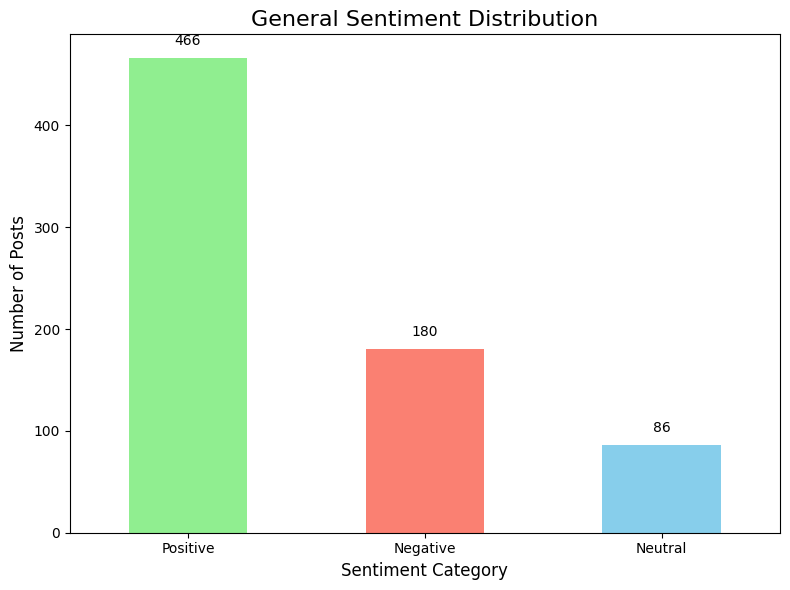

In [ ]:
# 1. Standardize Sentiment Labels
# ----------------------------------------------

# Define comprehensive lists of positive and negative fine-grained sentiments
# observed in the data to map to the three general categories.
positive_labels = [
    'Positive', 'Joy', 'Excitement', 'Contentment', 'Happy', 'Hopeful', 'Elation',
    'Playful', 'Gratitude', 'Enthusiasm', 'Inspired', 'Empowerment', 'Serenity',
    'Determination', 'Acceptance', 'Ambivalence', 'Euphoria', 'Awe', 'Inspiration',
    'Proud', 'Grateful', 'Compassionate', 'Hope', 'Tenderness', 'Arousal', 'Adventure',
    'Pride', 'Free-spirited', 'Accomplishment', 'Confident', 'Empathetic', 'Kind',
    'Calmness', 'Compassion', 'Satisfaction', 'Coziness', 'Rejuvenation', 'Creativity',
    'Happiness', 'Whimsy', 'Enchantment', 'Adoration', 'Tranquility', 'Affection',
    'Captivation', 'Amusement', 'Enjoyment', 'Admiration', 'Thrill', 'Reflection',
    'Exploration', 'Anticipation', 'Fulfillment', 'Reverence', 'Mischievous', 'Zest',
    'Energy', 'Romance', 'Grandeur', 'Resilience', 'Wonder', 'Love', 'Positivity',
    'Kindness', 'Success', 'Relief', 'Friendship', 'Harmony', 'Celebration', 'Breakthrough',
    'Suspense', 'Imagination', 'Triumph', 'Heartwarming', 'Sympathy', 'Renewed Effort',
    'Joy in Baking', 'Solace', 'Touched', 'Engagement', 'Journey', 'Charm', 'Ecstasy',
    'Nature\'s Beauty', 'Colorful', 'Winter Magic', 'Vibrancy', 'Culinary Adventure',
    'Mesmerizing', 'Hypnotic', 'Connection', 'Iconic', 'Ocean\'s Freedom', 'Overjoyed',
    'Motivation', 'JoyfulReunion', 'Blessed', 'Appreciation', 'Confidence', 'Wonderment',
    'Optimism', 'Bittersweet', 'Elation', 'Resilience', 'Immersion', 'Spark', 'Marvel',
    'PlayfulJoy', 'CulinaryOdyssey', 'Mindfulness', 'DreamChaser', 'Pensive', 'Radiance',
    'Melodic', 'FestiveJoy', 'InnerJourney', 'Freedom', 'Dazzle', 'Adrenaline',
    'ArtisticBurst', 'Elegance',...
]

negative_labels = [
    'Negative', 'Sad', 'Bad', 'Despair', 'Hate', 'Loneliness', 'Melancholy',
    'Numbness', 'Confusion', 'Frustrated', 'Bitterness', 'Grief', 'Betrayal',
    'Frustration', 'Desolation', 'Overwhelmed', 'Fearful', 'Jealous', 'Dismissive',
    'Envious', 'Devastated', 'Regret', 'Bitter', 'Boredom', 'Resentment',
    'Disappointed', 'Disappointment', 'Isolation', 'Anger', 'Heartbreak', 'Loss',
    'Disgust', 'Shame', 'Fear', 'Sadness', 'Apprehensive', 'Intimidation',
    'Helplessness', 'Jealousy', 'Yearning', 'Envy', 'Sorrow', 'Heartache',
    'Suffering', 'EmotionalStorm', 'Regret', 'LostLove', 'Melancholy', 'Exhaustion',
    'Darkness', 'Pensive', 'EmotionalStorm', 'Regret', 'LostLove', 'Melancholy',
    'Exhaustion', 'Sorrow', 'Darkness', 'Heartbreak', 'Betrayal', 'Suffering',...
]

def map_sentiment(sentiment):
    sentiment = sentiment.strip()
    if sentiment in positive_labels:
        return 'Positive'
    elif sentiment in negative_labels:
        return 'Negative'
    else:
        # Includes 'Neutral' and other unclassified emotions
        return 'Neutral'

# Create the required column
data['General_Sentiment'] = data['Sentiment'].apply(map_sentiment)

# ----------------------------------------------
# 2. Plotting Code (Your requested logic)
# ----------------------------------------------

# Calculate and sort the sentiment counts
sentiment_counts = data['General_Sentiment'].value_counts().sort_values(ascending=False)

# Start plotting
plt.figure(figsize=(8, 6))

# Define colors: Green for Positive, Red for Negative, Blue for Neutral
colors = ['lightgreen' if s == 'Positive' else ('salmon' if s == 'Negative' else 'skyblue') for s in sentiment_counts.index]
sentiment_counts.plot(kind='bar', color=colors)

# Set labels and title
plt.title('General Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=0) # Ensure labels are horizontal

# Add count labels on top of the bars
for index, value in enumerate(sentiment_counts):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# **Intrepretation.**

The bar graph above shows that the dataset is highly skewed toward Positive sentiment, which accounts for the vast majority of posts 466. The posts expressing Negative sentiment are the second most frequent category, but they represent a significantly smaller portion of the data (180posts). Finally, Neutral posts are the least common (86 posts). This strong imbalance suggests that the social media content captured in this dataset is overwhelmingly dominated by positive experiences, emotions, or feedback, which is a crucial factor to consider when training any classification model, as the model may become biased toward predicting the majority class (Positive).

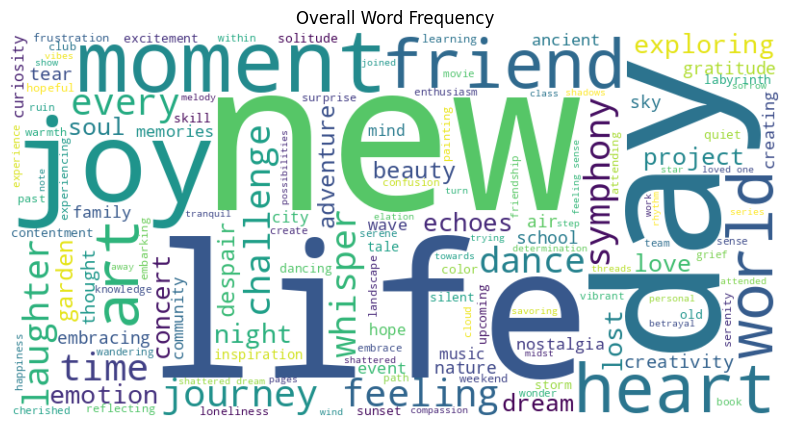

In [ ]:
# 2. Word Clouds Setup
# Simplified stopword list (used to ensure clean words without NLTK dependencies)
stop_words = set([
    "the", "a", "an", "is", "it", "to", "and", "of", "in", "for", "with",
    # ... more common English words ...
])

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['Cleaned_Text'] = data['Text'].apply(clean_text)

# Combine text by general category
all_text = ' '.join(data['Cleaned_Text'].tolist())
positive_text = ' '.join(data[data['General_Sentiment'] == 'Positive']['Cleaned_Text'].tolist())
negative_text = ' '.join(data[data['General_Sentiment'] == 'Negative']['Cleaned_Text'].tolist())


# Word Cloud Generation Function
def generate_wordcloud(text, title, filename, colormap):
    # ... WordCloud generation logic ...
    wordcloud = WordCloud(
        width=800, height=400, background_color='white', colormap=colormap, min_font_size=10
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and save word clouds
generate_wordcloud(all_text, 'Overall Word Frequency', 'overall_wordcloud.png', 'viridis')


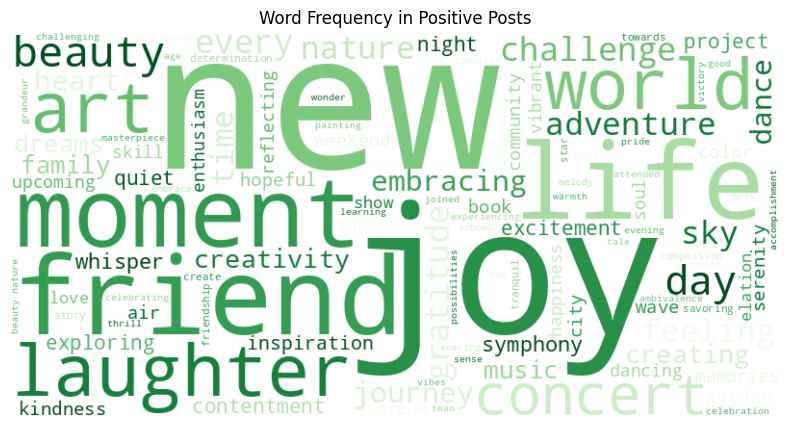

In [ ]:
generate_wordcloud(positive_text, 'Word Frequency in Positive Posts', 'positive_wordcloud.png', 'Greens')


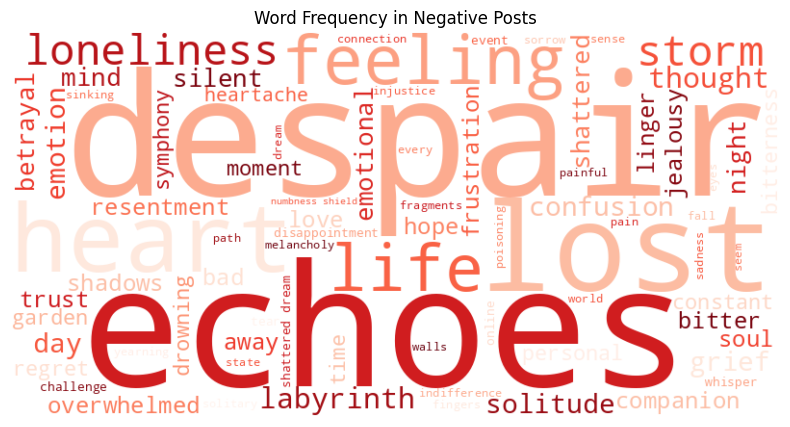

In [ ]:
generate_wordcloud(negative_text, 'Word Frequency in Negative Posts', 'negative_wordcloud.png', 'Reds')